In [2]:
import pandas as pd
import numpy as ny
import json
import nltk
import re
from collections import Counter
import matplotlib.pyplot as plt
#needed

#Code to read in body text but has not been used yet
class Reader:
    def OpenFile(index, path):
        with open(path) as jsonF:
            content = json.load(jsonF)
            index.body_text = []
            for entry in content['body_text']:
                index.body_text.append(entry['text'])
            index.body_text = '\n'.join(index.body_text)
row = Reader(all_json[0])
print(row)

In [38]:
#Functions
#splits words for abstract
def getWords(index):
    Abstract = smallab.iloc[index]['abstract']
    #Abstract_words = re.split('(.*?\s.*?\s.*?\s.*?)\s', Abstract)
    Abstract_words = re.split('\\W+', Abstract)
    Abstract_words = list(map(lambda x: x.lower(), Abstract_words))
    return Abstract_words
#splits words for journals sources .... pretty useless
def getWordsJ(index):
    J_list = journals.iloc[index]['journal']
    J_words = re.split('(.*?\s.*?\s.*?\s.*?)\s', J_list)
    J_words = list(map(lambda x: x.lower(), J_words))
    return J_words
#splits words for titles
def getWordsT(index):
    Ttles = smallt.iloc[index]['title']
    #titlew = re.split('(.*?\s.*?)\s', Ttles)
    titlew = re.split('\\W+', Ttles)
    titlew = list(map(lambda x: x.lower(), titlew))
    return titlew
#removes words less than 4 characters
def remove(List):
    newlist=[]
    for word in range(len(List)):
        if len(List[word]) >= 4:
            newlist.append(List[word])
    return newlist
#removes words less than 4 characters
def removeJ(List):
    newlist=[]
    for word in range(len(List)):
        newlist.append(List[word])
    return newlist
# Now I am going to run through and do a check for each Dictionary
def checkDict(List,Words):
    matches = []
    for i in Words:
        count = 0 
        for j in set(i):
            for k in List:
                if j == k:
                    count = count + 1
        matches.append(count)
    return matches
def checkMatchedWords(List,Words):
    wordsperab =[]
    for i in Words:
        matchedwords =[]
        for j in set(i):
            for k in List:
                if j == k:
                    matchedwords.append(j)
        wordsperab.append(matchedwords)
    return wordsperab
#creates the similarity score
def insertTask(task,List):
    percentsim = []
    for i in task:
        temp = round((i/(len(List)))*100,1)
        percentsim.append(temp)
    return percentsim

In [63]:
dataF = pd.read_csv("metadata.csv") 
#loading in the file with pandas instead because spark was having a problem withe column names
#needed
dataF.drop_duplicates(subset ="title", keep = False, inplace = True)


#pretty useless but just going to keep it just in case
journals = dataF[['journal']]
#def getWords(index):
    journal_names = journals.iloc[index]['journal']
    journal_words = re.split('\\W+', journal_names)
    journal_words = list(map(lambda x: x.lower(), journal_words))
    return journal_words

jour = []
for line in range(len(journals)):
    c = getWords(line)
    jour.append(c)
jour

dataF['journal'].Counter().most_common()
frequent = Counter(dataF[['journal']])
frequent.most_common()
df = dataF.dropna(subset=['journal'])
df['journal'].value_counts().max()

#not done coding
i =0 
columnname = 'pmc_json_files'
for i in pmc_jsonF.range(i,len(pmc_jsonF)):
    with open(pmc_jsonF['pmc_json_files'].values[i])

In [7]:
ab = dataF[['abstract']]
ab = ab.dropna()
ab.reset_index(drop=True,inplace=True)
titles = dataF[['title']]
titles = titles.dropna()
titles.reset_index(drop=True,inplace=True)
#journals = dataF[['journal']]
#journals = journals.dropna()
#journals.reset_index(drop=True,inplace=True)

In [8]:
#getting cleaned abstract list
smallab = ab.iloc[0:104333]
cleanedablist = []
for line in range(len(smallab)):
    a = getWords(line)
    #acleaned = remove(a)
    #cleanedablist.append(acleaned)
    cleanedablist.append(a)

#getting cleaned title list
smallt = titles.iloc[0:158897]
cleanedtlist = []
for line in range(len(smallt)):
    t = getWordsT(line)
    tcleaned = remove(t)
    cleanedtlist.append(tcleaned)

#getting cleaned journal list
smallj = journals.iloc[0:150007]
cleanedjlist = []
for line in range(len(smallj)):
    j = getWordsJ(line)
    jcleaned = remove(j)
    cleanedjlist.append(jcleaned)

In [8]:
#count for abstracts
Count = Counter()
for i in cleanedablist:
    for j in set(i):
        Count[j] += 1
#Count.most_common()

In [46]:
#Dictionary List
#Task 1: Transmissions, Incubation, and Environmental Stability
trans_Incub_enviro = ['transmissible','transmission','immune','infectious','symptomatic','airborne','spread','aerosol','aerosols','asymptomatic','blood','surface','animal','incubation','stability','climate','enviromental','surfaces','contact','sars','cov','covid','outbreak','coronavirus','transmitted','aerosolization']
#Task 2: COVID-19 Risk Factors
risk_factors = ['cancer','pregnant','pregnancy','death','critical','infections','risks','aneurysms','respiratory','mortality','severe','deaths','asthma','diabetes','severity','pneumonia','chronic','diseases','disease','infection','age','smoking','deaths','sars','cov','covid','coronavirus','obese','obesity','bmi']
#Task 3: Vaccines and Therapeutics
vacc = ['vaccination','antibody','vaccine','drug','hydroxychloroquine','drugs','vaccines','medicine','treated','therapeutic','therapy','therapeutics','sars','cov','covid','coronavirus']
#Task 4: Virus genetics, orgin, and evolution
gene_ori_evo = ['genome','china','outbreak','genomes','mutations','source','origin','genomic','genes','strain','evolution','genetic','wuhan','protein','proteins','rna','dna','mrnas','sequence','sequences','subgenomic','rnas','mrna','mutation','sars','cov','covid','coronavirus']
#Task 5: Medical Care
med_care = ['treatment','antibody','surgical','prevention','antibodies','surgery','care','telemedicine','medical','insurance','resources','nursing','ventilation','sars','cov','covid','coronavirus']
#Task 6: Ethical and social science considerations
Eth_soc = ['ethics','ethical','social','considerations','underprivileged','racial','race','minority','unethical','policy','legal','societal','bioethics','science','disparities','sars','cov','covid','coronavirus']
#Task 7: Non-pharmaceutical interventions
Non_pharma = ['therapies','isolation','protection','lockdown','distancing','quarantine','prevention','nonpharmaceutical','covering','closure','mask','masks','home','isolate','cover','sars','cov','covid','coronavirus']
#Task 8: Diagnostics and Surveillance
diagno_surve = ['analysis','model','trial','surveillance','diagnostic','diagnosis','screening','monitoring','identification','imaging','testing','prognosis','estimation','predicting','modelling','detection','research','pcr','models','prediction','sars','cov','covid','coronavirus']

totalwordlength = len(trans_Incub_enviro)+len(risk_factors)+len(vacc)+len(gene_ori_evo)+len(med_care)+len(Eth_soc)+len(Non_pharma)+len(diagno_surve)
print(totalwordlength)

179


In [ ]:
wordcheck = ['']

#count for titles
Countt = Counter()
for i in cleanedtlist:
    for j in set(i):
        Countt[j] += 1
Countt.most_common()

mostcommont = pd.DataFrame(Countt.most_common(30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
mostcommont.sort_values(by='count').plot.barh(x='words',y='count', ax=ax, color="purple")
plt.show()

mostcommon = pd.DataFrame(Count.most_common(30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
mostcommon.sort_values(by='count').plot.barh(x='words',y='count', ax=ax, color="purple")
plt.show()

mostcommonj = pd.DataFrame(Countj.most_common(30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
mostcommonj.sort_values(by='count').plot.barh(x='words',y='count', ax=ax, color="purple")
plt.show()

In [65]:
#Creating a new DataFrame with the lists of words and Id of paper
Ab_ids = dataF[['cord_uid','abstract']]
Ab_ids = Ab_ids.dropna()
Ab_ids.reset_index(drop=True,inplace=True)
Ab_ids['abstract words'] = cleanedablist


In [56]:
#WARNING----- THIS TAKES A LONG TIME TO RUN -------
#calliing all functions to place articles into bins
task1 = checkDict(trans_Incub_enviro,cleanedablist)
pertask1=insertTask(task1,trans_Incub_enviro)

task2 = checkDict(risk_factors,cleanedablist)
pertask2=insertTask(task2,risk_factors)

task3 = checkDict(vacc,cleanedablist)
pertask3=insertTask(task3,vacc)

task4 = checkDict(gene_ori_evo,cleanedablist)
pertask4=insertTask(task4,gene_ori_evo)

task5 = checkDict(med_care,cleanedablist)
pertask5=insertTask(task5,med_care)

task6 = checkDict(Eth_soc,cleanedablist)
pertask6=insertTask(task6,Eth_soc)

task7 = checkDict(Non_pharma,cleanedablist)
pertask7=insertTask(task7,Non_pharma)

task8 = checkDict(diagno_surve,cleanedablist)
pertask8=insertTask(task8,diagno_surve)



In [47]:
task1w = checkMatchedWords(trans_Incub_enviro,cleanedablist)

task2w = checkMatchedWords(risk_factors,cleanedablist)

task3w = checkMatchedWords(vacc,cleanedablist)

task4w = checkMatchedWords(gene_ori_evo,cleanedablist)

task5w = checkMatchedWords(med_care,cleanedablist)

task6w = checkMatchedWords(Eth_soc,cleanedablist)

task7w = checkMatchedWords(Non_pharma,cleanedablist)

task8w = checkMatchedWords(diagno_surve,cleanedablist)



In [53]:
#creates new columns in the dataframe 
Ab_ids['Transmissions, Incubation, and Environmental Stability Words'] = task1w
Ab_ids['Risk Factors Words'] = task2w
Ab_ids['Vaccines and Therapeutics Words'] = task3w
Ab_ids['Virus genetics, orgin, and evolution Words'] = task4w
Ab_ids['Medical Care Words'] = task5w
Ab_ids['Ethical and social science considerations Words'] = task6w
Ab_ids['Non-pharmaceutical interventions Words'] = task7w
Ab_ids['Diagnostics and Surveillance Words'] = task8w


In [62]:
#count for journals
Countj = Counter()
for i in task8w:
    for j in set(i):
        Countj[j] += 1
Countj.most_common()

[('coronavirus', 19385),
 ('covid', 19317),
 ('analysis', 18338),
 ('sars', 13911),
 ('cov', 11893),
 ('model', 11272),
 ('research', 9315),
 ('diagnosis', 7468),
 ('detection', 7090),
 ('pcr', 6735),
 ('models', 5770),
 ('diagnostic', 5247),
 ('testing', 4989),
 ('identification', 3732),
 ('surveillance', 3518),
 ('trial', 3333),
 ('screening', 3227),
 ('imaging', 3163),
 ('monitoring', 3089),
 ('prediction', 1501),
 ('prognosis', 1375),
 ('predicting', 950),
 ('estimation', 710),
 ('modelling', 612)]

In [51]:
#creates new columns in the dataframe and writes the dataframe into an excel file
Ab_ids['Transmissions, Incubation, and Environmental Stability'] = pertask1
Ab_ids['Risk Factors'] = pertask2
Ab_ids['Vaccines and Therapeutics'] = pertask3
Ab_ids['Virus genetics, orgin, and evolution'] = pertask4
Ab_ids['Medical Care'] = pertask5
Ab_ids['Ethical and social science considerations'] = pertask6
Ab_ids['Non-pharmaceutical interventions'] = pertask7
Ab_ids['Diagnostics and Surveillance'] = pertask8
Ab_ids['Addition'] = Ab_ids['Diagnostics and Surveillance']+Ab_ids['Non-pharmaceutical interventions']+Ab_ids['Ethical and social science considerations']+Ab_ids['Medical Care']+Ab_ids['Virus genetics, orgin, and evolution']+Ab_ids['Vaccines and Therapeutics']+Ab_ids['Risk Factors']+Ab_ids['Transmissions, Incubation, and Environmental Stability']
#Ab_ids.to_excel('output.xlsx', index=False)

In [52]:
Ab_ids['Transmissions, Incubation, and Environmental Stability']= (Ab_ids['Transmissions, Incubation, and Environmental Stability']/Ab_ids['Addition'])*100
Ab_ids['Risk Factors'] = (Ab_ids['Risk Factors']/Ab_ids['Addition'])*100
Ab_ids['Vaccines and Therapeutics'] = (Ab_ids['Vaccines and Therapeutics']/Ab_ids['Addition'])*100
Ab_ids['Virus genetics, orgin, and evolution'] = (Ab_ids['Virus genetics, orgin, and evolution']/Ab_ids['Addition'])*100
Ab_ids['Medical Care'] = (Ab_ids['Medical Care']/Ab_ids['Addition'])*100
Ab_ids['Ethical and social science considerations'] = (Ab_ids['Ethical and social science considerations']/Ab_ids['Addition'])*100
Ab_ids['Non-pharmaceutical interventions'] = (Ab_ids['Non-pharmaceutical interventions']/Ab_ids['Addition'])*100
Ab_ids['Diagnostics and Surveillance'] = (Ab_ids['Diagnostics and Surveillance']/Ab_ids['Addition'])*100

Ab_ids['Addition'] = Ab_ids['Diagnostics and Surveillance']+Ab_ids['Non-pharmaceutical interventions']+Ab_ids['Ethical and social science considerations']+Ab_ids['Medical Care']+Ab_ids['Virus genetics, orgin, and evolution']+Ab_ids['Vaccines and Therapeutics']+Ab_ids['Risk Factors']+Ab_ids['Transmissions, Incubation, and Environmental Stability']

In [54]:
Ab_ids

,cord_uid,abstract,abstract words,"Transmissions, Incubation, and Environmental Stability Words",Risk Factors Words,Vaccines and Therapeutics Words,"Virus genetics, orgin, and evolution Words",Medical Care Words,Ethical and social science considerations Words,Non-pharmaceutical interventions Words,Diagnostics and Surveillance Words,"Transmissions, Incubation, and Environmental Stability",Risk Factors,Vaccines and Therapeutics,"Virus genetics, orgin, and evolution",Medical Care,Ethical and social science considerations,Non-pharmaceutical interventions,Diagnostics and Surveillance,Addition
0,ug7v899j,OBJECTIVE: This retrospective chart review des...,"[objective, this, retrospective, chart, review...",[],"[age, respiratory, mortality, infections, pneu...",[],[],[],[],[],[],0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.2
1,02tnwd4m,Inflammatory diseases of the respiratory tract...,"[inflammatory, diseases, of, the, respiratory,...",[],"[disease, diseases, respiratory]",[],[proteins],[],[],[],[models],0.000000,58.730159,0.000000,19.047619,0.000000,0.000000,0.000000,22.222222,18.9
2,ejv2xln0,Surfactant protein-D (SP-D) participates in th...,"[surfactant, protein, d, sp, d, participates, ...","[immune, surface]","[diseases, respiratory]",[],[protein],[],[],[],[],41.176471,39.572193,0.000000,19.251337,0.000000,0.000000,0.000000,0.000000,18.7
3,2b73a28n,Endothelin-1 (ET-1) is a 21 amino acid peptide...,"[endothelin, 1, et, 1, is, a, 21, amino, acid,...",[],"[chronic, diseases, disease]",[],[],[],[],[],[],0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.1
4,9785vg6d,Respiratory syncytial virus (RSV) and pneumoni...,"[respiratory, syncytial, virus, rsv, and, pneu...",[],"[respiratory, infections, pneumonia, infection]",[],[genomic],[],[],[],[pcr],0.000000,65.486726,0.000000,15.929204,0.000000,0.000000,0.000000,18.584071,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104328,ntropr17,The seven NIH‐sponsored Regional Primate Resea...,"[the, seven, nih, sponsored, regional, primate...",[],"[disease, diseases]",[medicine],[],"[surgical, surgery, treatment]",[],[],"[research, model]",0.000000,18.734177,15.696203,0.000000,44.556962,0.000000,0.000000,21.012658,39.5
104329,mixxjvte,"We are inviting submissions of articles, persp...","[we, are, inviting, submissions, of, articles,...",[],[],[drug],[],[],[],[],[research],0.000000,0.000000,59.615385,0.000000,0.000000,0.000000,0.000000,40.384615,10.4
104330,t9bt70f2,"The recent outbreak of pneumonia in Wuhan, Chi...","[the, recent, outbreak, of, pneumonia, in, wuh...","[sars, infectious, cov, outbreak, coronavirus]","[sars, severe, cov, risks, coronavirus, respir...","[sars, cov, coronavirus]","[sars, china, cov, outbreak, wuhan, coronaviru...","[sars, cov, coronavirus, prevention]","[sars, cov, coronavirus]","[sars, cov, coronavirus, prevention]","[sars, prediction, predicting, cov, coronaviru...",10.792580,14.558741,10.567735,16.076447,13.209668,8.881394,11.860596,14.052839,177.9
104331,nhpjvgt4,"Coronavirus disease 2019 (COVID‐19), is respon...","[coronavirus, disease, 2019, covid, 19, is, re...","[immune, covid, coronavirus]","[disease, chronic, risks, covid, coronavirus, ...","[therapeutic, covid, coronavirus]","[covid, coronavirus]","[covid, coronavirus, treatment]","[covid, coronavirus]","[therapies, covid, coronavirus]","[covid, coronavirus]",9.647651,24.832215,15.771812,5.956376,14.765101,8.808725,13.255034,6.963087,119.2


In [55]:
Ab_ids.to_excel('output.xlsx', index=False)

In [19]:
Counttask1 = Counter()
for i in pertask4:
    Counttask1[i] += 1
Counttask1.most_common()

[(0.0, 45071),
 (3.6, 21531),
 (7.1, 13616),
 (10.7, 8931),
 (14.3, 6774),
 (17.9, 3812),
 (21.4, 2142),
 (25.0, 1188),
 (28.6, 625),
 (32.1, 327),
 (35.7, 187),
 (39.3, 75),
 (42.9, 31),
 (46.4, 13),
 (50.0, 7),
 (53.6, 2),
 (75.0, 1)]

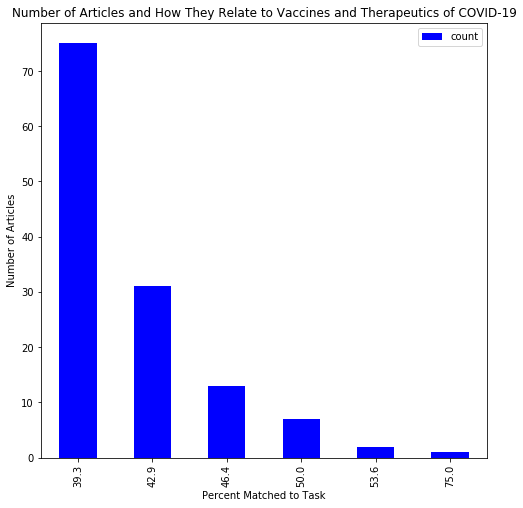

In [26]:
#creates plot for Task 1
Task1df = pd.DataFrame(Counttask1.most_common()[-6:], columns=['percent', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
Task1df.sort_values(by='percent').plot.bar(x='percent',y='count', ax=ax, color="blue")
plt.xlabel('Percent Matched to Task', color = 'black')
plt.ylabel('Number of Articles', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.title('Number of Articles and How They Relate to Vaccines and Therapeutics of COVID-19', color = 'black')
#Transmissions, Incubation, and Environmental Stability of COVID-19
plt.show()

Task1best = Ab_ids.loc[Ab_ids['Task 1 percent'] == 66.7]
Task1best.reset_index(drop=True,inplace=True)
Task1best.iloc[0]['abstract']

#creates plot for Task 1
Task1df = pd.DataFrame(Ab_ids, columns=['Ethical and social science considerations', 'Addition'])
fig, ax = plt.subplots(figsize=(8, 8))
Task1df.sort_values(by='Addition').plot.scatter(x='Addition',y='Ethical and social science considerations', ax=ax, color="blue")
plt.xlabel('Correlation score with Covid-19', color = 'black')
plt.ylabel('Percent Article correlates with Risk Factors', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.title('Number of Articles and How They Relate to Risk Factors of COVID-19', color = 'black')
#Transmissions, Incubation, and Environmental Stability of COVID-19
plt.show()